# PyTorch Tensor Operations

This section covers:
* Indexing and slicing
* Reshaping tensors (tensor views)
* Tensor arithmetic and basic operations
* Dot products
* Matrix multiplication
* Additional, more advanced operations

## Perform standard imports

In [ ]:
import torch
import numpy as np

## Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br><br>

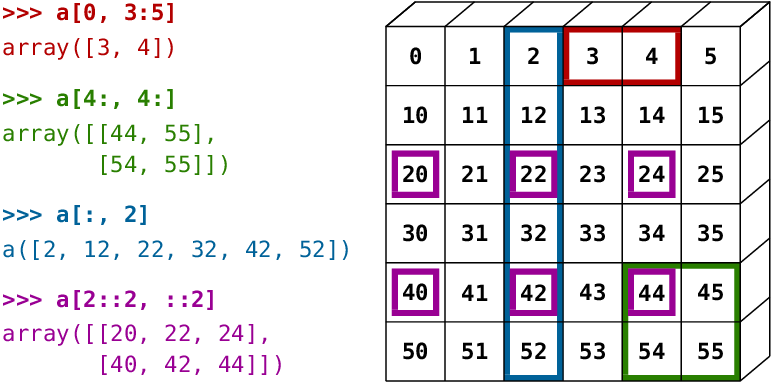


In [ ]:
# vector
x = torch.arange(6)
print(x)
print(x.shape)
print(x.ndim)

tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])
1


In [ ]:
x = x.reshape(-1, 3)   # reshape(3, 2) ?
print(x)
print(x.shape)

tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


In [ ]:
# Grabbing the right hand column values
print(x[:,0])  # row : 전체, column : [0]
print(x[:,0].shape)

tensor([0, 3])
torch.Size([2])


In [ ]:
# Grabbing the right hand column as a (3,1) slice
print(x)
print(x[:,1:])
print(x[:,1:].shape)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[1, 2],
        [4, 5]])
torch.Size([2, 2])


In [ ]:
print(x[:,0:1])
print(x[:,0:1].shape)

tensor([[0],
        [3]])
torch.Size([2, 1])


In [ ]:
print(x[:,1:2])
print(x[:,1:2].shape)

tensor([[1],
        [4]])
torch.Size([2, 1])


In [ ]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]]
    )

print(x[:,1:])
print(x[:,1:].shape)

tensor([[2, 3],
        [5, 6],
        [8, 9]])
torch.Size([3, 2])


## Reshape tensors with <tt>.view()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.

In [ ]:
x = torch.arange(12)
print(x)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
x.view(2,6)   # x.reshape(2,6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [ ]:
x.view(2,-1)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [ ]:
x.view(6,2)  # x.reshape(2, -1)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

In [ ]:
x.view(-1, 2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

In [ ]:
# x is unchanged
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
y = x.view(-1, 2)
print(y)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])


### Views reflect the most current data

In [ ]:
z = x.view(2,6)
print(z)
print(x)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
x[0] = 234
print(x)
print(z)
print(z.size())

tensor([234,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11])
tensor([[234,   1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11]])
torch.Size([2, 6])


### Views can infer the correct size
By passing in <tt>-1</tt> PyTorch will infer the correct value from the given tensor

In [ ]:
# infer number of columns for given rows
y = x.view(2,-1)

In [ ]:
print(y.size())

torch.Size([2, 6])


In [ ]:
# infer number of rows for given columns
x.view(-1,3)

tensor([[234,   1,   2],
        [  3,   4,   5],
        [  6,   7,   8],
        [  9,  10,  11]])

In [ ]:
print(x.view(-1,3).size())

torch.Size([4, 3])


### Adopt another tensor's shape with <tt>.view_as()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view_as'><strong><tt>view_as(input)</tt></strong></a> only works with tensors that have the same number of elements.

In [ ]:
print(x)
print(z)

x.view_as(z)

tensor([234,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11])
tensor([[234,   1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11]])


tensor([[234,   1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11]])

In [ ]:
print(z.size())
x.view(z.size())

torch.Size([2, 6])


tensor([[234,   1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10,  11]])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [ ]:
# a = torch.tensor([1,2,3], dtype=torch.float)
# b = torch.tensor([4,5,6], dtype=torch.float)

a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])

# element-wise add
print(a + b)

tensor([5, 7, 9])


As arguments passed into a torch operation:

In [ ]:
print(torch.add(a, b))

tensor([5, 7, 9])


With an output tensor passed in as an argument:

In [ ]:
result = torch.empty(3) # memory에 이미 존재하는 not initialized value
result

tensor([1.5766e-19, 1.0256e-08, 2.6252e-06])

**Changing a tensor in-place** with *_*

In [ ]:
a.add_(b)  # equivalent to a=torch.add(a,b)
print(a)

tensor([5, 7, 9])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic(산술연산)</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations(단항식)</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry(삼각함수)</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics(통계)</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a, b)
print(torch.add(a,b).sum())

tensor([1., 2., 3.]) <built-in method type of Tensor object at 0x7e52f590aff0>
tensor(21.)


In [ ]:
max = torch.max(a)
min = torch.min(b)
print('max : ', max, '   min : ', min)

max :  tensor(3.)    min :  tensor(4.)


In [ ]:
print(a)
print(b)
# 최대, 최소값의 index
amax = torch.argmax(a)
amin = torch.argmin(b)
print('amax : ', amax, '   amin : ', amin)

tensor([1., 2., 3.])
tensor([4., 5., 6.])
amax :  tensor(2)    amin :  tensor(0)


## Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices.
```
[1x3]@[3x1]  -> @ : 행렬(2D Tensor)곱 연산
```
For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # for reference
print(a.dot(b))

tensor([ 4., 10., 18.])

tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication. We show matrix multiplication below.</div>

## Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>

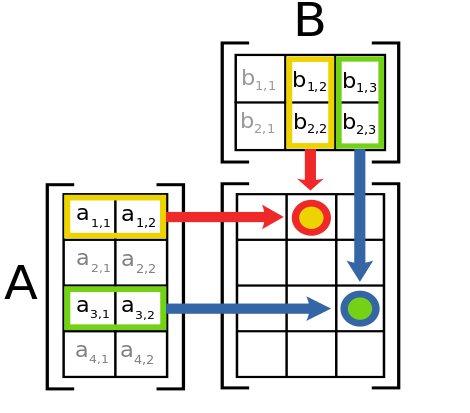
<br>

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

<div style="clear:both">Image source: <a href='https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg'>https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg</a></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [ ]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.shape)
print('b: ',b.shape)
print('a x b: ',torch.mm(a,b).size())  # torch,mm is same as torch.matmul
print(torch.mm(a,b))

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])
tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(torch.mm(a,b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(torch.matmul(a,b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(a.mm(b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(a @ b)

tensor([[56., 62.],
        [80., 89.]])


### Matrix multiplication with broadcasting
Matrix multiplication that involves <a href='https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics'>broadcasting</a> can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.matmul'><strong><tt>torch.matmul(a,b)</tt></strong></a> or `a.matmul(b)` or `a @ b`

In [ ]:
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 5)

In [ ]:
t1, t1.size()

(tensor([[[ 0.2058, -0.3556, -1.1494,  1.5213],
          [ 0.8481, -2.3754,  0.7079,  1.6897],
          [ 0.1911,  1.5023,  0.0461, -0.3262]],
 
         [[ 0.1896,  1.2003,  0.5084,  0.2872],
          [-2.0879, -0.5593,  0.7833, -1.2290],
          [-1.3976, -0.6181, -0.2906,  0.8356]]]),
 torch.Size([2, 3, 4]))

In [ ]:
t2, t2.size()

(tensor([[ 1.2819, -1.2389, -0.5573, -0.6623,  0.2273],
         [-0.3823,  1.2300,  0.4816, -0.7538, -0.5071],
         [-0.4727,  1.0984, -0.9625, -1.5632,  2.4482],
         [ 0.3838, -1.6107,  0.8938,  0.1224,  1.1314]]),
 torch.Size([4, 5]))

`torch.matmul(t1, t2).size() == (2, 3, 5)`

- support broasting, allow various input tensors

In [ ]:
print(torch.matmul(t1, t2).size())

torch.Size([2, 3, 5])


In [ ]:
print(torch.matmul(t1, t2))

tensor([[[-0.3624,  1.7060, -0.7576, -2.2742,  1.8972],
         [ 1.3649, -1.6915,  0.7710,  0.1690, -1.5061],
         [ 0.6799, -2.7021,  2.3682,  4.4300, -5.5545]],

        [[ 0.6281,  0.4906, -0.0638, -1.6441, -0.1260],
         [-1.6967,  0.2855,  1.2551,  1.5782,  0.8248],
         [-0.5248, -1.4579, -0.5043,  0.8663,  3.4020]]])


However, the same operation raises a <tt><strong>RuntimeError</strong></tt> with <tt>torch.mm()</tt>:

`torch.mm(t1, t2).size()`

- don't support broadcasting, only 2-tensor input allow

In [ ]:
print(torch.mm(t1, t2).size())

RuntimeError: self must be a matrix

___
# Advanced operations

## L2 or Euclidian Norm
- 두 점 사이의 직선 거리

  See <a href='https://pytorch.org/docs/stable/torch.html#torch.norm'><strong><tt>torch.norm()</tt></strong></a>

  The <a href='https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm'>Euclidian Norm</a> gives the vector norm of $x$ where $x=(x_1,x_2,...,x_n)$.<br>
  It is calculated as<br>

  ${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}}$


  When applied to a matrix, <tt>torch.norm()</tt> returns the <a href='https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm'>Frobenius norm</a> by default.

In [ ]:
x = torch.tensor([2.,5.,8.,14.])
x.norm()

tensor(17.)

## Number of elements
See <a href='https://pytorch.org/docs/stable/torch.html#torch.numel'><strong><tt>torch.numel()</tt></strong></a>

Returns the number of elements in a tensor.

In [ ]:
# 3행 7열 = 21개 element 반환
x = torch.ones(3,7)
x.numel()

21

This can be useful in certain calculations like Mean Squared Error:<br>
<tt>
def mse(t1, t2):<br>
&nbsp;&nbsp;&nbsp;&nbsp;diff = t1 - t2<br>
    &nbsp;&nbsp;&nbsp;&nbsp;return torch.sum(diff * diff) / diff<strong>.numel()</strong></tt>

<a href="https://colab.research.google.com/github/shanaka-desoysa/notes/blob/main/content/deep_learning/pytorch/tensor_operations.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>